## Content list

#### 1. Import libraries
#### 2. Import data
#### 3. Data cleaning
#### 4. Standardization
#### 5. The elbow technique
#### 6. K-means clustering
#### 7. Visualizations
#### 8. Discussion on clusters
#### 9. Descriptive statistics for cluster
#### 10. Future steps
#### 11. Export data

## 1. Import libraries

In [71]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler   # For data standardization
from sklearn.metrics import pairwise_distances   # To calculate total within-cluster distance
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import warnings

In [9]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [38]:
# Disable deprecation warnings that could indicate, for instance, a suspended library or feature. 
# These are more relevant to developers and very seldom to analysts.
warnings.filterwarnings('ignore')

## 2. Import data

In [4]:
# Turn project folder path into a string
path = r'C:\Users\Admin\Desktop\Data Analysis\Advanced Analytics & Dashboard Design\Competitive_LoL_Analysis'

In [5]:
path

'C:\\Users\\Admin\\Desktop\\Data Analysis\\Advanced Analytics & Dashboard Design\\Competitive_LoL_Analysis'

In [6]:
# Import league competitive data
df_lol = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'competitve_data_cleaned_country.csv'), index_col = False)

In [7]:
# Check output
df_lol.head()

,gameid,league,year,date,game,patch,participantid,side,position,champion,...,teamkills,teamdeaths,damagetochampions,damageshare,totalgold,golddiffat15,xpdiffat15,kda,region,country
0,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,1,Blue,top,Renekton,...,10,14,10063,0.286116,12202,1690.0,-346.0,2.0,Europe,United Kingdom
1,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,2,Blue,jng,Nocturne,...,10,14,4562,0.129709,9892,-378.0,74.0,2.0,Europe,United Kingdom
2,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,3,Blue,mid,Akali,...,10,14,11408,0.324358,10279,279.0,-330.0,1.0,Europe,United Kingdom
3,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,4,Blue,bot,Kalista,...,10,14,6014,0.170993,11703,213.0,1319.0,2.0,Europe,United Kingdom
4,LOLTMNT06_13630,LEC,2024,2024-01-13,1,14.01,5,Blue,sup,Pyke,...,10,14,3124,0.088823,7580,-75.0,-1313.0,1.0,Europe,United Kingdom


In [8]:
# Print number of rows and columns in df_lol
df_lol.shape

(10512, 35)

## 3. Data cleaning

In [16]:
# Remove data from China region as they do not contains information on golddiffat15 and xpdiffat15
df_lol_eunakr = df_lol.loc[df_lol['region'] != 'China']

In [17]:
# Checking if region containing china have been dropped.
df_lol_eunakr['region'].value_counts()

region
Korea            2904
Europe           2076
North America    1032
Name: count, dtype: int64

In [23]:
# Remove data from position which have team, as we are only looking at individual player data
df_lol_indi = df_lol_eunakr.loc[df_lol_eunakr['position'] != 'team']

In [25]:
# Checking if team data have been dropped.
df_lol_indi['position'].value_counts()

position
top    1002
jng    1002
mid    1002
bot    1002
sup    1002
Name: count, dtype: int64

In [26]:
# Drop non-numeric columns
df_lol_numeric = df_lol_indi.select_dtypes(include=[np.number])

In [27]:
# Verify non-numeric columns are dropped
print(df_lol_numeric.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 10461
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               5010 non-null   int64  
 1   game               5010 non-null   int64  
 2   patch              5010 non-null   float64
 3   participantid      5010 non-null   int64  
 4   gamelength         5010 non-null   int64  
 5   result             5010 non-null   int64  
 6   kills              5010 non-null   int64  
 7   deaths             5010 non-null   int64  
 8   assists            5010 non-null   int64  
 9   teamkills          5010 non-null   int64  
 10  teamdeaths         5010 non-null   int64  
 11  damagetochampions  5010 non-null   int64  
 12  damageshare        5010 non-null   float64
 13  totalgold          5010 non-null   int64  
 14  golddiffat15       5010 non-null   float64
 15  xpdiffat15         5010 non-null   float64
 16  kda                5010 non-

In [28]:
# Dropping other irrelevant columns
df_lol_clean = df_lol_numeric.drop(columns=['year', 'game', 'participantid'])

In [29]:
# Verify non-numeric columns are dropped
print(df_lol_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5010 entries, 0 to 10461
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patch              5010 non-null   float64
 1   gamelength         5010 non-null   int64  
 2   result             5010 non-null   int64  
 3   kills              5010 non-null   int64  
 4   deaths             5010 non-null   int64  
 5   assists            5010 non-null   int64  
 6   teamkills          5010 non-null   int64  
 7   teamdeaths         5010 non-null   int64  
 8   damagetochampions  5010 non-null   int64  
 9   damageshare        5010 non-null   float64
 10  totalgold          5010 non-null   int64  
 11  golddiffat15       5010 non-null   float64
 12  xpdiffat15         5010 non-null   float64
 13  kda                5010 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 587.1 KB
None


In [30]:
# Checking the there is any missing data
df_lol_clean.isnull().sum()

patch                0
gamelength           0
result               0
kills                0
deaths               0
assists              0
teamkills            0
teamdeaths           0
damagetochampions    0
damageshare          0
totalgold            0
golddiffat15         0
xpdiffat15           0
kda                  0
dtype: int64

## 4. Standardization

In [52]:
# Define a standard scaler object
scaler = StandardScaler()

In [53]:
# Fit and transform data
df_lol_clean_scaled = scaler.fit_transform(df_lol_clean)

In [54]:
# Check output of scaled data
df_lol_clean_scaled

array([[-1.28082314, -0.61550723, -1.        , ..., -0.4237677 ,
        -0.65824245,  0.87670879],
       [-1.28082314, -0.61550723, -1.        , ...,  0.0906324 ,
        -0.65824245,  0.87670879],
       [-1.28082314, -0.61550723, -1.        , ..., -0.40417151,
        -0.86151235, -0.33329425],
       ...,
       [ 1.45210868,  0.42772861,  1.        , ..., -0.66014679,
        -0.42593399, -1.54329729],
       [ 1.45210868,  0.42772861,  1.        , ...,  1.24558309,
         1.17118669,  2.08671182],
       [ 1.45210868,  0.42772861,  1.        , ...,  0.22535623,
         0.62913361,  0.87670879]])

## 5. The elbow technique

In [66]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

In [67]:
# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [68]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_lol_clean_scaled).score(df_lol_clean_scaled) for i in range(len(kmeans))] 

In [69]:
# Check score output
score

[-75150.0,
 -57659.31898355021,
 -50158.60168764522,
 -45572.86769060198,
 -42103.18661806307,
 -39974.10261977399,
 -38292.433045164755,
 -36893.713409206175,
 -35634.12641054922]

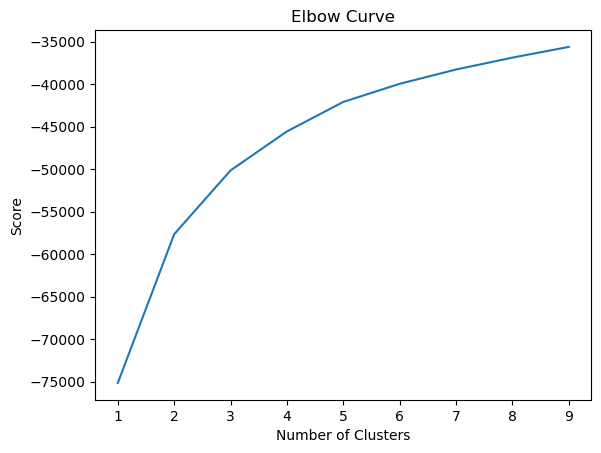

In [70]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  For this data, there's a visible jump from 1 to 4 on the x-axis, but after that, the curve starts to flatten out. This means that the optimal count for my clusters is 4.

## 6. K-means clustering

In [81]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [82]:
# Fit the k-means object to the data.
kmeans.fit(df_lol_clean)

KMeans(n_clusters=4)

In [83]:
# Create columns for cluster label in the dataset
df_lol_clean['clusters'] = kmeans.fit_predict(df_lol_clean)

In [85]:
# Check output of the dataset
df_lol_clean.head(20)

,patch,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,damagetochampions,damageshare,totalgold,golddiffat15,xpdiffat15,kda,clusters
0,14.01,1749,0,3,3,3,10,14,10063,0.286116,12202,1690.0,-346.0,2.000000,1
1,14.01,1749,0,2,2,2,10,14,4562,0.129709,9892,-378.0,74.0,2.000000,1
2,14.01,1749,0,2,3,1,10,14,11408,0.324358,10279,279.0,-330.0,1.000000,2
3,14.01,1749,0,2,2,2,10,14,6014,0.170993,11703,213.0,1319.0,2.000000,1
4,14.01,1749,0,1,4,3,10,14,3124,0.088823,7580,-75.0,-1313.0,1.000000,1
5,14.01,1749,1,4,3,2,14,10,16517,0.248840,12737,-1690.0,346.0,2.000000,2
6,14.01,1749,1,4,1,5,14,10,5230,0.078794,10773,378.0,-74.0,9.000000,1
7,14.01,1749,1,2,0,7,14,10,16062,0.241985,12609,-279.0,330.0,9.000000,2
8,14.01,1749,1,4,2,5,14,10,21133,0.318383,13274,-213.0,-1319.0,4.500000,0
9,14.01,1749,1,0,4,7,14,10,7434,0.111998,7414,75.0,1313.0,1.750000,1


In [86]:
# Check value count of each cluster
df_lol_clean['clusters'].value_counts()

clusters
1    1973
2    1824
0    1001
3     212
Name: count, dtype: int64

## 7. Visualizations

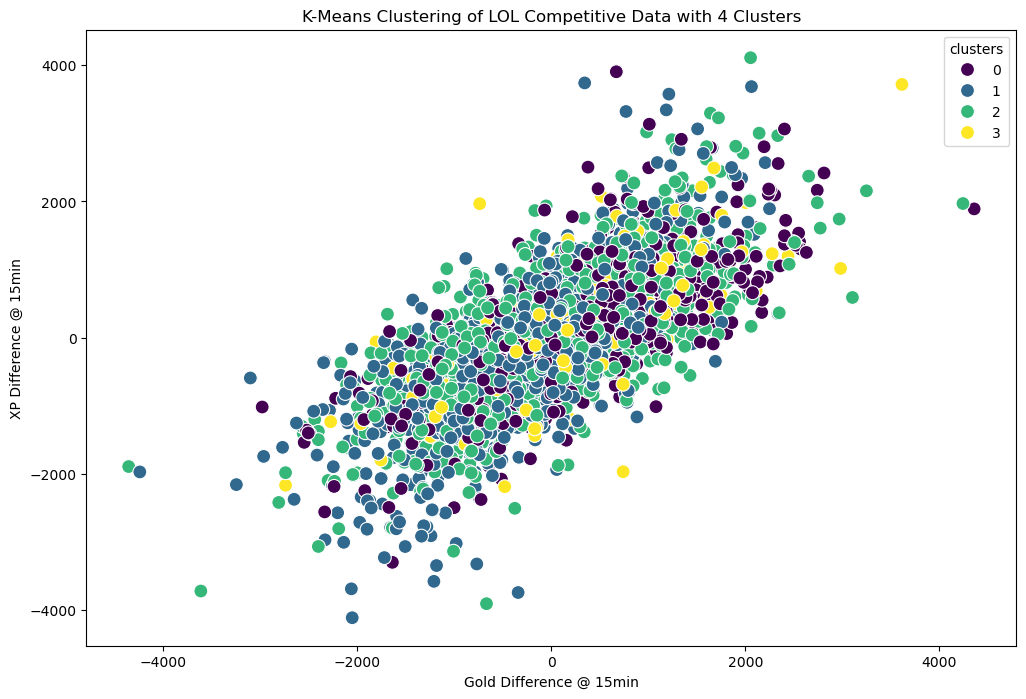

In [111]:
# Plotting the clusters of golddiffat15 and xpdiffat15
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_clean, x='golddiffat15', y='xpdiffat15', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('Gold Difference @ 15min')
plt.ylabel('XP Difference @ 15min')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering.png'),  bbox_inches = 'tight');

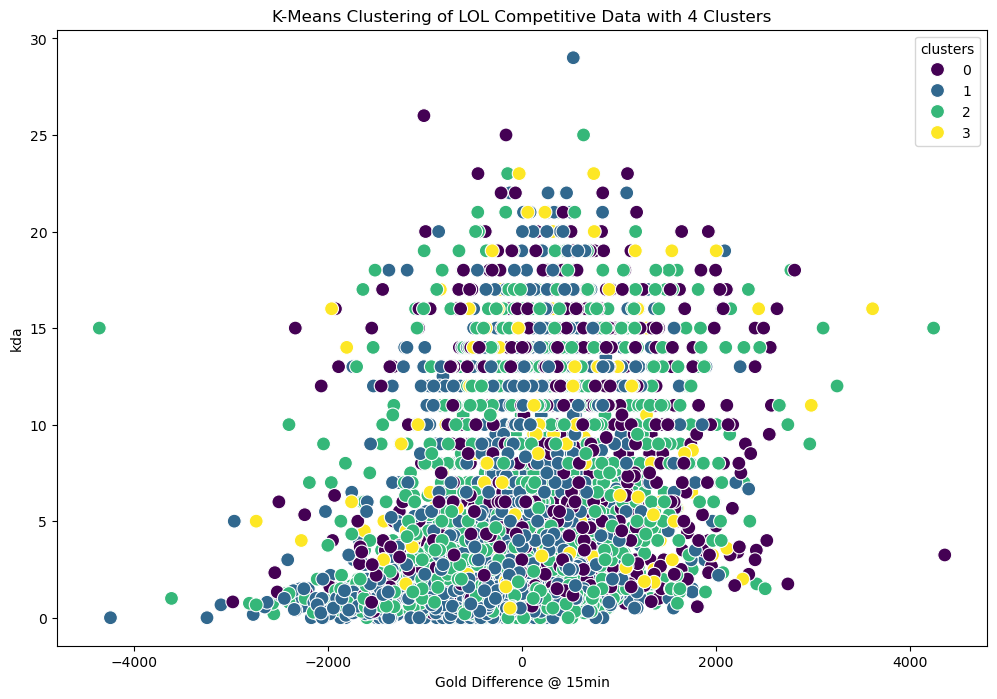

In [110]:
# Plotting the clusters of golddiffat15 and kda
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_clean, x='golddiffat15', y='kda', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('Gold Difference @ 15min')
plt.ylabel('kda')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_2.png'),  bbox_inches = 'tight');

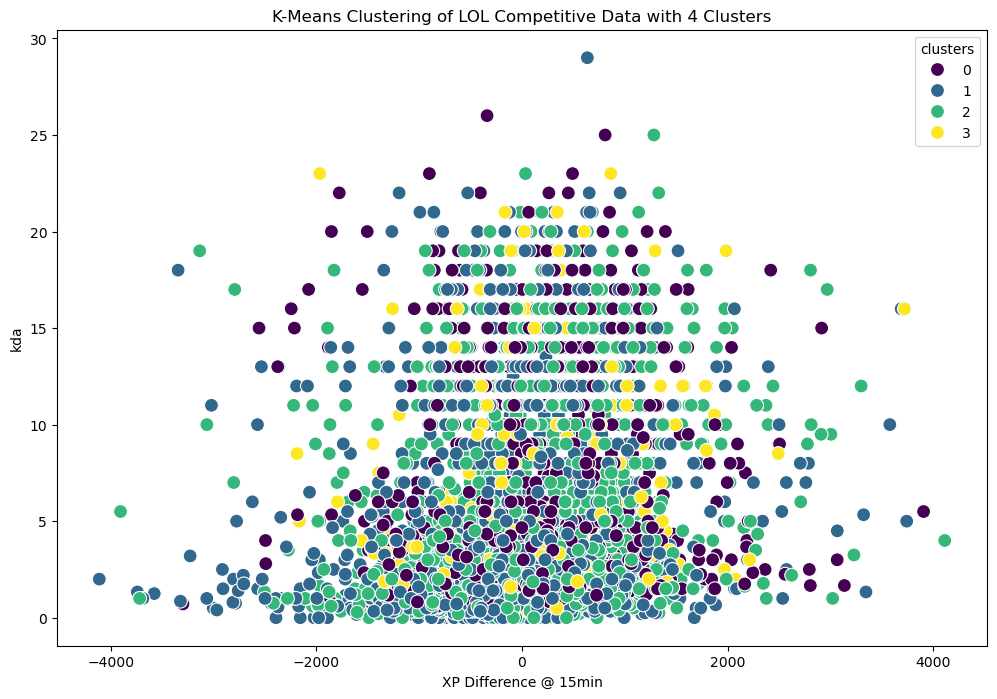

In [109]:
# Plotting the clusters of xpdiffat15 and kda
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_clean, x='xpdiffat15', y='kda', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('XP Difference @ 15min')
plt.ylabel('kda')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_3.png'),  bbox_inches = 'tight');

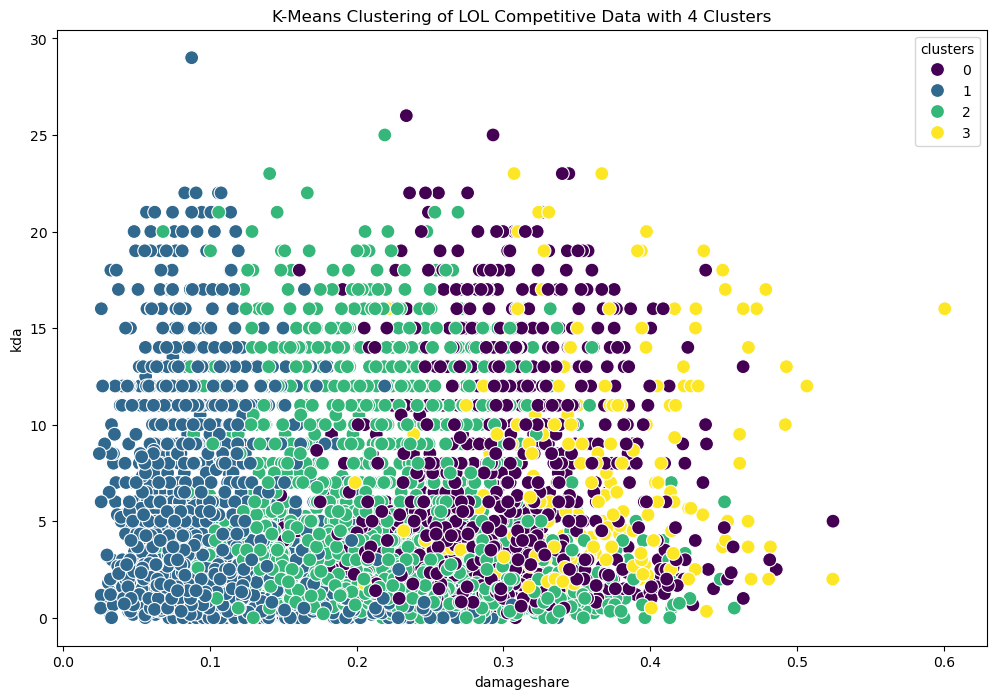

In [108]:
# Plotting the clusters of damageshare and kda
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_clean, x='damageshare', y='kda', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('damageshare')
plt.ylabel('kda')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_4.png'),  bbox_inches = 'tight');

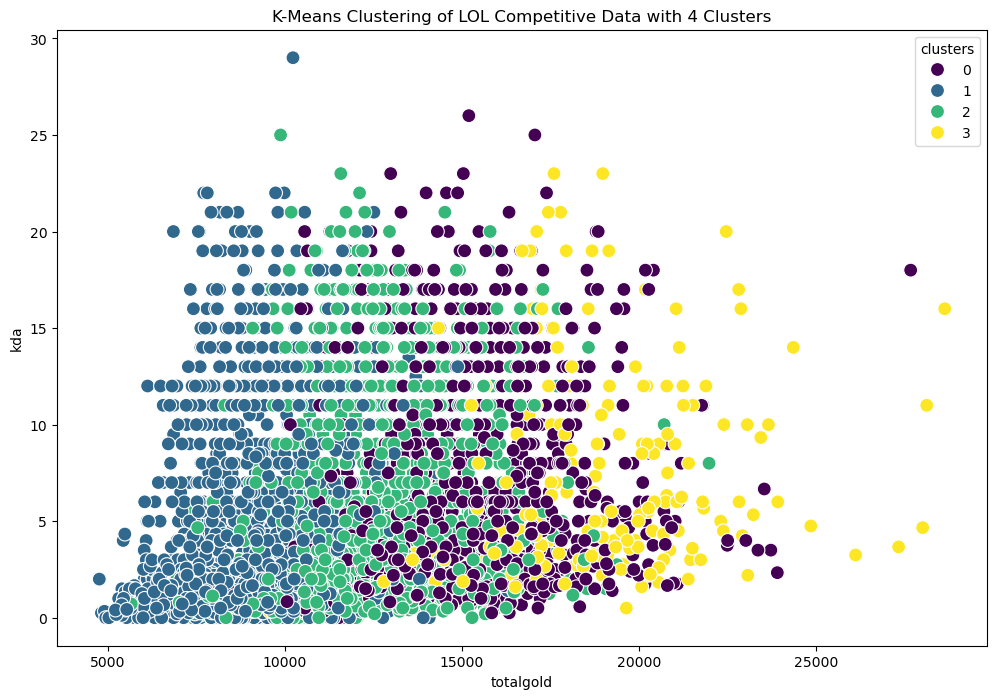

In [107]:
# Plotting the clusters of totalgold and kda
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_clean, x='totalgold', y='kda', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('totalgold')
plt.ylabel('kda')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_5.png'),  bbox_inches = 'tight');

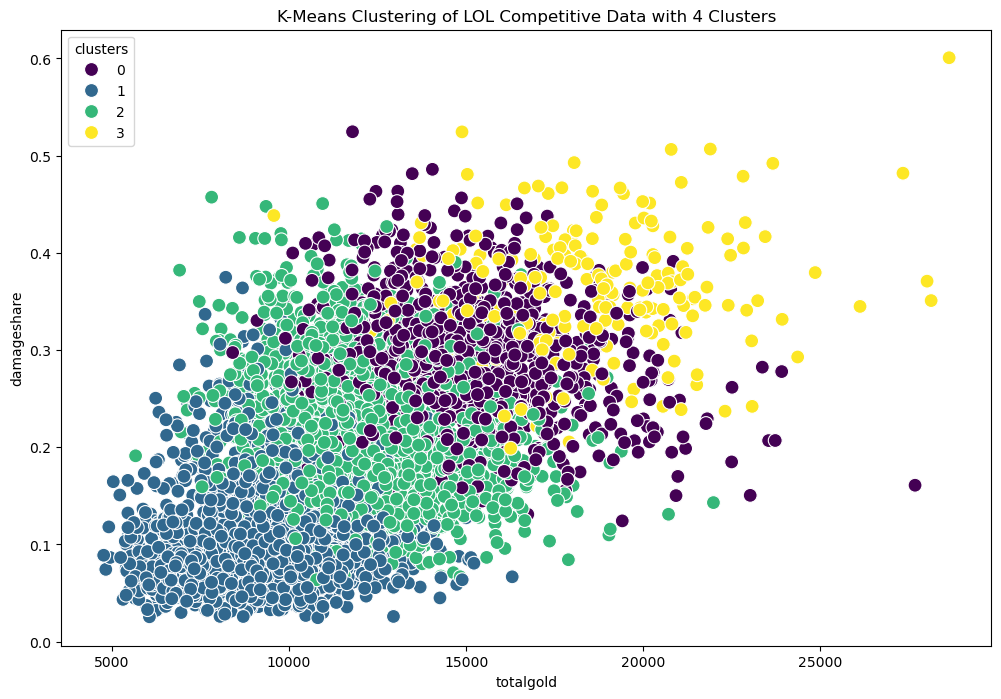

In [106]:
# Plotting the clusters of totalgold and damageshare
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_lol_clean, x='totalgold', y='damageshare', hue='clusters', palette='viridis', s=100)
plt.title('K-Means Clustering of LOL Competitive Data with 4 Clusters')
plt.xlabel('totalgold')
plt.ylabel('damageshare')
plt.legend(title='clusters')

# Export the scatterplot of clusters
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'kmeans_clustering_6.png'),  bbox_inches = 'tight');

## 8. Discussion on clusters

### The cluster on makes sense as they group the data points based on the performance of the players statistics such as percentage damage contribution in game and total gold earn in the game. Cluster 3 (Yellow) is the highest performing players data points as they have high total gold and high damage share in game. Cluster 1 (Blue) is the lowest performing players data points based on their damage contribution and gold.

### The cluster can be view in terms of the player performance in the game:
#### Cluster 3 (Yellow): Highest performance players
#### Cluster 0 (Purple): High performance players
#### Cluster 2 (Green): Moderate performance players
#### Cluster 1 (Blue): Low performance players

## 9. Descriptive statistics for clusters

In [100]:
df_lol_clean.loc[df_lol_clean['clusters'] == 0, 'cluster'] = 'purple'
df_lol_clean.loc[df_lol_clean['clusters'] == 1, 'cluster'] = 'blue'
df_lol_clean.loc[df_lol_clean['clusters'] == 2, 'cluster'] = 'green'
df_lol_clean.loc[df_lol_clean['clusters'] == 3, 'cluster'] = 'yellow'

In [102]:
# Basic descriptive statistics for each cluster
df_lol_clean.groupby('cluster').agg({'result':['mean', 'median'], 
                                    'kills':['mean', 'median'], 
                                    'deaths':['mean', 'median'],
                                    'assists':['mean', 'median'], 
                                    'damagetochampions':['mean', 'median'],
                                    'damageshare':['mean', 'median'],
                                    'totalgold':['mean', 'median'],
                                    'golddiffat15':['mean', 'median'], 
                                    'xpdiffat15':['mean', 'median'],
                                    'kda':['mean', 'median']
                                   })

result            kills           deaths          assists         \
             mean median      mean median      mean median      mean median   
cluster                                                                       
blue     0.401419    0.0  1.000000    1.0  2.849975    3.0  6.714648    6.0   
green    0.521930    1.0  2.802632    2.0  2.492325    2.0  5.775768    5.0   
purple   0.631369    1.0  4.631369    4.0  2.468531    2.0  6.854146    7.0   
yellow   0.608491    1.0  6.792453    6.0  2.636792    3.0  7.349057    7.0   

        damagetochampions          damageshare               totalgold  \
                     mean   median        mean    median          mean   
cluster                                                                  
blue          6814.085150   6780.0    0.112230  0.099673   9175.931069   
green        15468.660088  15340.5    0.224744  0.223490  12385.507675   
purple       25471.295704  24906.0    0.293742  0.293940  15031.740260   
yellow       42335.438679  40051.5    0.361334  0.359244  18560.915094   

                 golddiffat15         xpdiffat15              kda         
          median         mean median        mean median      mean median  
cluster                                                                   
blue      9127.0  -175.388748 -124.0 -131.697922 -114.0  4.265563   2.25  
green    12345.0    44.959430   55.0   48.577303   46.0  5.218922   3.50  
purple   14880.0   219.757243  216.0  137.802198  132.0  6.745133   5.00  
yellow   18493.5   207.825472  155.5  157.051887  121.5  7.342341   5.50

### By looking through the descriptive statistics, it confirms again that the cluster is grouped by the performance of the players based on the different game statistics. I can see that the yellow cluster is the highest performing players as the mean statistics for all the different game statistics is the highest compared to the other clusters (with exception of deaths stats and golddiffat15 stats).

## 10. Future steps

### K-means clustering is a useful way of to categorized the players performance in the game based on all the different stats of the game. It would be useful for a player who is looking to improve themselves to have an idea of what kind of numbers they should aim for in all the different statistics in the game. 

#### One future step to consider looking into would be to break down the dataset further into the 5 different position/roles (Top, Mid, Jungle, Support, Bottom) of the players and perform k-means clustering on the datasets to have a better gauge of player perfromance based on their position/role.

## 11. Export data

In [103]:
# Export the "df_lol_clean" dataframe to CSV
df_lol_clean.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustered_lol_competitive_data.csv'), index=False)